# Enseñando a sumar a una Red Neuronal

Primero impotamos los paquetes necesarios

* numpy para cálculo matricial
* keras para crear modelos de deep learning usando TensorFlow como backend
* sklearn.preprocessing para preprocesar los datos
* sklearn.model_selection para hacer la división del dataset en entrenamiento y test
* matplotlib.pyplot para hacer gráficas

In [1]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


Creamos el conjunto de datos. Básicamente cogemos 2 conjuntos de números enteros aleatorios y los sumamos.

In [2]:
n1 = np.random.randint(-1000, 1000, (20000,1))
n2 = np.random.randint(-1000, 1000, (20000,1))
result = np.add(n1,n2)
feat = np.hstack((n1,n2,result))

Dividimos el conjunto de datos en entrenamiento (80% de las muestras) y test (20% de las muestras) e instanciamos una StandardScaler que transforma los datos de forma que le resta la media y los divide por la desviación típica. Tal que así:

$$ x_t = \frac{x - \mu}{\sigma} $$

In [3]:
x = feat[:,:2]
y = feat[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("x_train size", x_train.shape)
print("y_train size", y_train.shape)
print("x_test size", x_test.shape)
print("y_test size", y_test.shape)
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train.astype(np.float32))


x_train size (16000, 2)
y_train size (16000,)
x_test size (4000, 2)
y_test size (4000,)


Creamos la red neuronal que consiste de una sola capa con 16 neuronas, cuyos pesos se inicializan con una distribución normal. Finalmente elegimos MSE como función de perdida y ADAM como optimizador

In [4]:
model = Sequential()
model.add(Dense(16, input_dim=2, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

Ajustamos el modelo

In [5]:
history = model.fit(x_train,y_train, epochs=50, validation_split=0.33)

Train on 10719 samples, validate on 5281 samples
Epoch 1/50
10719/10719 [==============================] - 1s 115us/step - loss: 664468.0937 - val_loss: 644233.8384

Ya hemos ajustado el modelo y vamos a probar como se comporta con el conjunto de test

In [6]:
model.predict(scaler.transform(x_test.astype(np.float32))).astype(np.int).reshape((-1,))

array([  180, -1085,  1026, ...,    92,   -52,  1066])

In [7]:
y_test

array([  180, -1085,  1027, ...,    92,   -53,  1066])

Vamos a mostrar un gráfico con la evolución a lo largo de las épocas de la perdida en evaluación y en entrenamiento

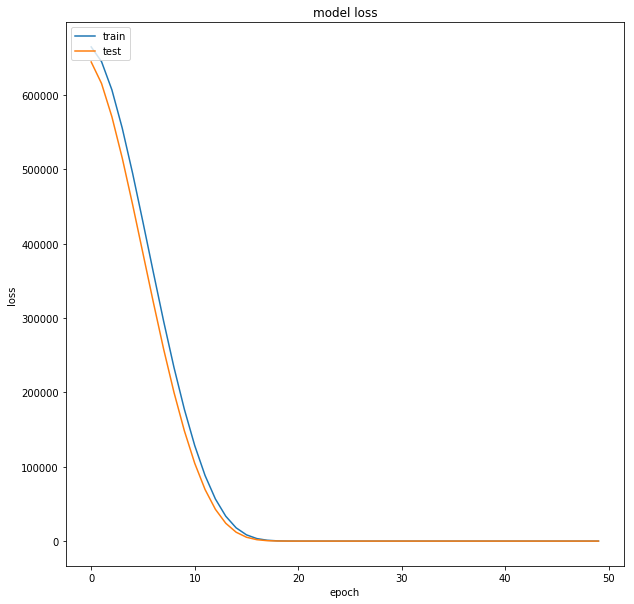

In [8]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Vamos a hacer una prueba. Vamos a probar a sumar 100 + 120

In [9]:
model.predict(scaler.transform(np.array([[100,120]], dtype=np.float32))).astype(np.int)

array([[220]])